# Airbnb in NYC

## 1. Introduction

 This project deals with Airbnb data collected in New York City (NYC) in 2019. The data set consists of three files, `airbnb_price.csv`, `airbnb_last_review.csv` and `airbnb_room_type.csv` downloaded from [Kaggle](https://www.kaggle.com/datasets/ebrahimelgazar/new-york-city-airbnb-market). These files have received some preliminary cleaning using Google Sheets and are now ready for analysis using Python.
 
 The purpose of this project is to answer the question: "What drives the rental cost of an Airbnb rental in NYC?" The data contains the following information:
 
 1. `airbnb_price.csv`:
     - `listing_id`: unique identification number for each Airbnb listing.
     - `price`: the rental price for the listing.
     - `nbhood_full`: the full NYC neighborhood name, consisiting of both borough and neighborhood.
     - `formatted_price`: the same information as the `price` column in a format for analysis.
     - `formatted_borough`: the `nbhood_full` column reformatted to contain only the borough name.
     - `formatted_nbhood`: the `nbhood_full` column reformatted to contain only the neighborhood name.
 
 2. `airbnb_last_review.csv`:
     - `host_name`: the name of the person hosting the listing on Airbnb.
     - `listing_id`: same as in `airbnb_price.csv`.
     - `last_review`: the date of the last review.
     - `formatted_name`: `host_name` reformatted for ease of analysis.
     - `formatted_last_review`: `last_review` dates reformatted for Python analysis.
 
 3. `airbnb_room_type.csv`:
     - `listing_id`: the same as `airbnb_price.csv`.
     - `description`: the listing description on airbnb.
     - `room_type`: the room type of the listing.
     - `formatted_description`: the `description` column reformatted for Python analysis.
     - `formatted_room_type`: the `room_type` column reformatted for Python analysis.
 
## 2. Project Scoping

 **Central Question**: What drives Airbnb rental prices in NYC?
 
 Sub-questions:
 
 1. How many rentals are there in NYC? In each Borough? Neighborhood?
 
 2. What is the average and median rental price in NYC? Borough? Neighborhood?
 
 3. What is the average and median rental price for each room type?
 
 4. Does the answer to question three change with borough and/or neighborhood?
 
## 3. Exploratory Data Analysis
 
### 3.1 Price Data Set

The first data set I want to look at is the price data. With this data, I can determine the number of rentals represented in the data. I will also be able to calculate the mean and median rental prices for the city, each borough and neighborhood. In order to calculate the summary price statisitcs for room types, I will first need to join the `airbnb_price.csv` and `airbnb_room_type.csv` data sets. This will be done later.

First things first, importing the data set and doing a quick inspection.

In [1]:
import pandas as pd

prices = pd.read_csv('airbnb_price.csv')

prices = prices.drop('Unnamed: 6', axis = 1)
prices.head()

,listing_id,price,nbhood_full,formatted_price,formatted_borough,formatted_nbhood
0,20333471,0 dollars,"Bronx, East Morrisania",$0.00,Bronx,East Morrisania
1,20523843,0 dollars,"Brooklyn, Bushwick",$0.00,Brooklyn,Bushwick
2,20639628,0 dollars,"Brooklyn, Bedford-Stuyvesant",$0.00,Brooklyn,Bedford-Stuyvesant
3,20639792,0 dollars,"Brooklyn, Bedford-Stuyvesant",$0.00,Brooklyn,Bedford-Stuyvesant
4,20639914,0 dollars,"Brooklyn, Bedford-Stuyvesant",$0.00,Brooklyn,Bedford-Stuyvesant


The first thing I noticed when importing the data into a dataframe object was that an "Unnamed" column was added. I looked at this column on it's one and it contained no data so I was able to remove it.

Now I would like get a quick look at the data set as a whole.

In [2]:
prices.describe(include = 'all')

,listing_id,price,nbhood_full,formatted_price,formatted_borough,formatted_nbhood
count,2.520900e+04,25209,25209,25209,25209,25209
unique,NaN,536,217,536,5,216
top,NaN,150 dollars,"Brooklyn, Bedford-Stuyvesant",$150.00,Brooklyn,Bedford-Stuyvesant
freq,NaN,982,2209,982,10466,2209
mean,2.068922e+07,NaN,NaN,NaN,NaN,NaN
std,1.102928e+07,NaN,NaN,NaN,NaN,NaN
min,2.595000e+03,NaN,NaN,NaN,NaN,NaN
25%,1.202273e+07,NaN,NaN,NaN,NaN,NaN
50%,2.234391e+07,NaN,NaN,NaN,NaN,NaN
75%,3.037669e+07,NaN,NaN,NaN,NaN,NaN


From the above, I now know that `airbnb_price.csv` file contains data for 25209 airbnb rental listings. There are five unique boroughs (as expected) and 216 unique neighborhoods. The neigborhood that houses the most rentals is Brooklyn. The neighborhood with the most rentals is Bedford-Stuyvesant.

I notice that, although I formatted the price data in google sheets, it is still being represented by a string object. This is because $ and , characters are present. I will need to remove those to conduct my analysis.

In [3]:
prices['formatted_price'] = prices['formatted_price'].str.replace('$', '').str.replace(',', '')

prices['formatted_price'].head()

C:\Users\zcron\AppData\Local\Temp\ipykernel_11004\1834041536.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prices['formatted_price'] = prices['formatted_price'].str.replace('$', '').str.replace(',', '')


0    0.00
1    0.00
2    0.00
3    0.00
4    0.00
Name: formatted_price, dtype: object

Before I finish cleaning this data, I want to note that there are some rentals that cost $0! How strange! Could this be missing data?

In [4]:
prices['formatted_price'] = prices['formatted_price'].astype('float64')

In [5]:
prices.describe(include = 'all')

,listing_id,price,nbhood_full,formatted_price,formatted_borough,formatted_nbhood
count,2.520900e+04,25209,25209,25209.000000,25209,25209
unique,NaN,536,217,NaN,5,216
top,NaN,150 dollars,"Brooklyn, Bedford-Stuyvesant",NaN,Brooklyn,Bedford-Stuyvesant
freq,NaN,982,2209,NaN,10466,2209
mean,2.068922e+07,NaN,NaN,141.777936,NaN,NaN
std,1.102928e+07,NaN,NaN,147.349137,NaN,NaN
min,2.595000e+03,NaN,NaN,0.000000,NaN,NaN
25%,1.202273e+07,NaN,NaN,69.000000,NaN,NaN
50%,2.234391e+07,NaN,NaN,105.000000,NaN,NaN
75%,3.037669e+07,NaN,NaN,175.000000,NaN,NaN


There we go. The data now appears to be clean. I can now see that the average rental price in NYC is $\$$141.78 &plusmn; $\$$147.40. The median price is $\$$105.00 with an Interquartile Range of $\$$106.00. This data suggested a left skewed data set suggesting the median price to be the more valuable statistic for analysis.

I would now like to go back to the $\$$0 rentals. Are they all from the same borough or neighborhood?

In [6]:
prices[prices['formatted_price'] == 0]

,listing_id,price,nbhood_full,formatted_price,formatted_borough,formatted_nbhood
0,20333471,0 dollars,"Bronx, East Morrisania",0.0,Bronx,East Morrisania
1,20523843,0 dollars,"Brooklyn, Bushwick",0.0,Brooklyn,Bushwick
2,20639628,0 dollars,"Brooklyn, Bedford-Stuyvesant",0.0,Brooklyn,Bedford-Stuyvesant
3,20639792,0 dollars,"Brooklyn, Bedford-Stuyvesant",0.0,Brooklyn,Bedford-Stuyvesant
4,20639914,0 dollars,"Brooklyn, Bedford-Stuyvesant",0.0,Brooklyn,Bedford-Stuyvesant
5,21291569,0 dollars,"Brooklyn, Bushwick",0.0,Brooklyn,Bushwick
6,21304320,0 dollars,"Brooklyn, Bushwick",0.0,Brooklyn,Bushwick


So, there are 7 listings with a rental price of $\$$0. 6 of them are being hosted in Brooklyn but there isn't an obvious reason for why these are listings rent for $\$$0.

I will now turn my attention to answering the question "How many rentals are in each borough?" I would also like to answer how many rentals are present in the top 10 neeighborhoods by number of rentals.

In [7]:
prices['formatted_borough'].value_counts()

Brooklyn         10466
Manhattan        10322
Queens            3456
Bronx              698
Staten Island      267
Name: formatted_borough, dtype: int64

In [8]:
prices['formatted_nbhood'].value_counts().head(10)

 Bedford-Stuyvesant    2209
 Williamsburg          1853
 Harlem                1435
 Bushwick              1202
 Hell's Kitchen        1119
 East Village           866
 Upper East Side        839
 Upper West Side        775
 Crown Heights          752
 East Harlem            672
Name: formatted_nbhood, dtype: int64

I would now like to begin creating data vizzes to answer the questions outlined in the Project Scoping section. To start, I would like to visualize the rental prices in NYC.

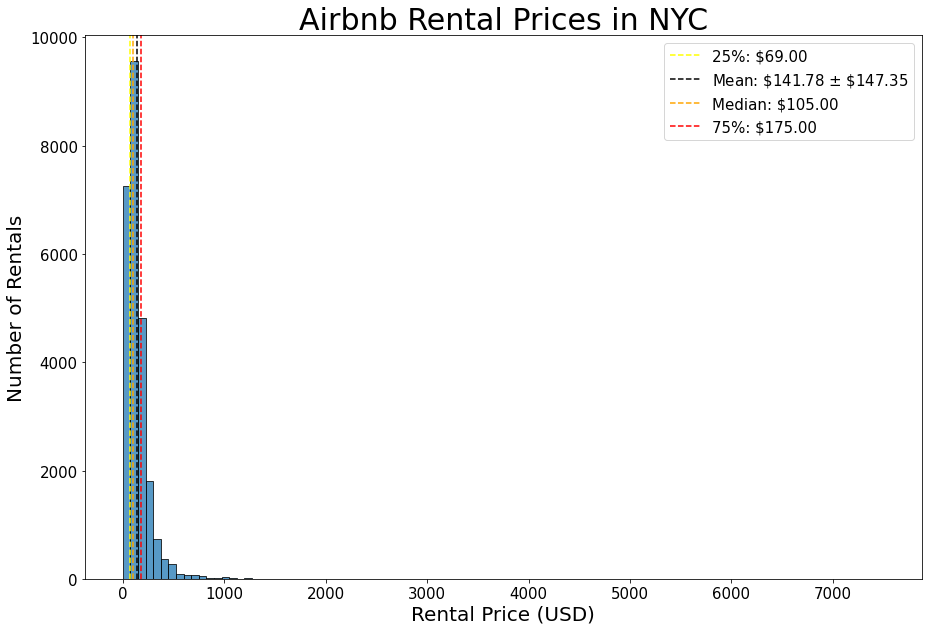

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize = (15, 10))

sns.histplot(
    x = 'formatted_price',
    data = prices,
    bins = 100,
    ax = ax
)

ax.axvline(np.percentile(prices.formatted_price, 25),
            label = r'25%: \${:.2f}'.format(np.percentile(prices.formatted_price, 25)),
            color = 'yellow',
            linestyle = '--')

ax.axvline(np.mean(prices.formatted_price),
            label = r'Mean: \${mean:.2f} $\pm$ \${std:.2f}'.format(mean = np.mean(prices.formatted_price),
                                                             std = np.std(prices.formatted_price)),
            color = 'black',
            linestyle = '--')

ax.axvline(np.median(prices.formatted_price),
            label = r'Median: \${:.2f}'.format(np.median(prices.formatted_price)),
            color = 'orange',
            linestyle = '--')

ax.axvline(np.percentile(prices.formatted_price, 75),
            label = r'75%: \${:.2f}'.format(np.percentile(prices.formatted_price, 75)),
            color = 'red',
            linestyle = '--')

ax.legend(fontsize = 15)
ax.set_xlabel('Rental Price (USD)', fontsize = 20)
ax.set_ylabel('Number of Rentals', fontsize = 20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.set_title('Airbnb Rental Prices in NYC', fontsize = 30)

plt.savefig('prices_hist.png')
plt.show()

I am curious as to why my x-axis presents with such a wide domain. It doesn't look like there is any data out there in this view but that could be because of the y-axis range.

In [10]:
prices[prices['formatted_price'] >= 2000]['formatted_price'].value_counts()

2000.0    4
2500.0    3
2250.0    2
2200.0    1
2600.0    1
2990.0    1
2995.0    1
3000.0    1
3613.0    1
5000.0    1
5100.0    1
7500.0    1
Name: formatted_price, dtype: int64

I can now see why these listings aren't visable in the histogram. There are only a few data points with extremely high rental prices and, when you compare that to 9000+ listings with rental prices between $\$$100-$\$$200, the bar height would be non-existent.

I would not like to look at how this distribution changes with borough. I will employ boxplots, ordered by descending median rental price to accomplish that task.

In [11]:
boroughs = [borough for borough in prices.formatted_borough.unique()]
print(boroughs)

['Bronx', 'Brooklyn', 'Queens', 'Manhattan', 'Staten Island']


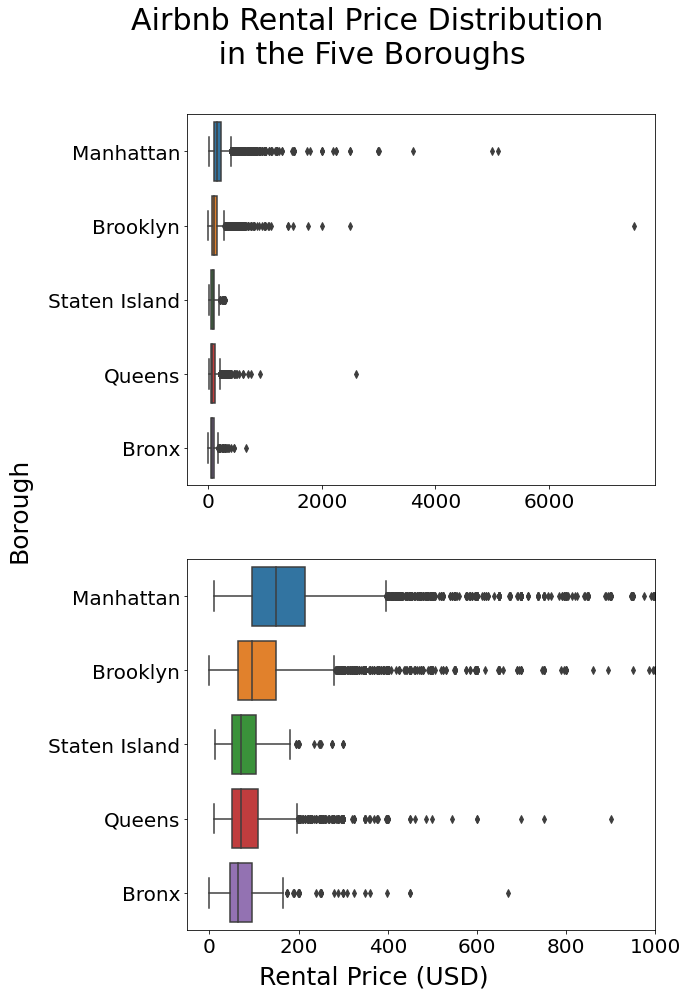

In [12]:
fig, axes = plt.subplots(2, 1, figsize = (10, 15))

borough_median_order = prices.groupby(by = 'formatted_borough')['formatted_price'].median().sort_values(ascending = False).index

sns.boxplot(
    y = 'formatted_borough',
    x = 'formatted_price',
    data = prices,
    order = borough_median_order,
    ax = axes[0]
)
axes[0].tick_params(axis = 'both', which = 'major', labelsize = 20)
axes[0].set(xlabel = None)
axes[0].set(ylabel = None)

sns.boxplot(
    y = 'formatted_borough',
    x = 'formatted_price',
    data = prices,
    order = borough_median_order,
    ax = axes[1]
)
axes[1].set_xlim((-50, 1000))
axes[1].tick_params(axis = 'both', which = 'major', labelsize = 20)
axes[1].set(xlabel = None)
axes[1].set(ylabel = None)

fig.text(x = 0.35, y = 0.075, s = 'Rental Price (USD)', fontsize = 25)
fig.text(x = 0, y = 0.47, s = 'Borough', fontsize = 25, rotation = 90)
fig.suptitle('Airbnb Rental Price Distribution\n in the Five Boroughs', fontsize = 30)
plt.subplots_adjust(left = 0.25)
plt.savefig('borough_boxplots.png')
plt.show()

Again, the x-axis is severely distorted by the outliers. To help visualize the distributions, I also provided a small x-axis domain to aid the reader. Here, I notice that Manhattan typically the home to the most expensive Airbnb rentals, while the Bronx is home to the cheapest. This visualization shows that the rental price is dependent on what borough you are looking to rent in. What about neighborhood?

In [13]:
nbhood_sorted_num_listings = prices.groupby(by = 'formatted_nbhood')['listing_id'].count().sort_values(ascending = False).index

print(nbhood_sorted_num_listings[:9])

Index([' Bedford-Stuyvesant', ' Williamsburg', ' Harlem', ' Bushwick',
       ' Hell's Kitchen', ' East Village', ' Upper East Side',
       ' Upper West Side', ' Crown Heights'],
      dtype='object', name='formatted_nbhood')


In [14]:
nbhood_lambda = lambda borough: borough if borough in nbhood_sorted_num_listings[:9] else 'Other'

prices['most_listings_nbhood'] = prices['formatted_nbhood'].apply(nbhood_lambda)

prices['most_listings_nbhood'].unique()

array(['Other', ' Bushwick', ' Bedford-Stuyvesant', ' Upper East Side',
       ' Harlem', ' Crown Heights', ' Williamsburg', ' East Village',
       ' Upper West Side', " Hell's Kitchen"], dtype=object)

In [15]:
top_10_nbhood_median_sorted = prices.groupby(by = 'most_listings_nbhood')['formatted_price'].median().sort_values(ascending = False).index
print(top_10_nbhood_median_sorted)

Index([' Hell's Kitchen', ' East Village', ' Upper West Side',
       ' Upper East Side', ' Williamsburg', 'Other', ' Crown Heights',
       ' Harlem', ' Bedford-Stuyvesant', ' Bushwick'],
      dtype='object', name='most_listings_nbhood')


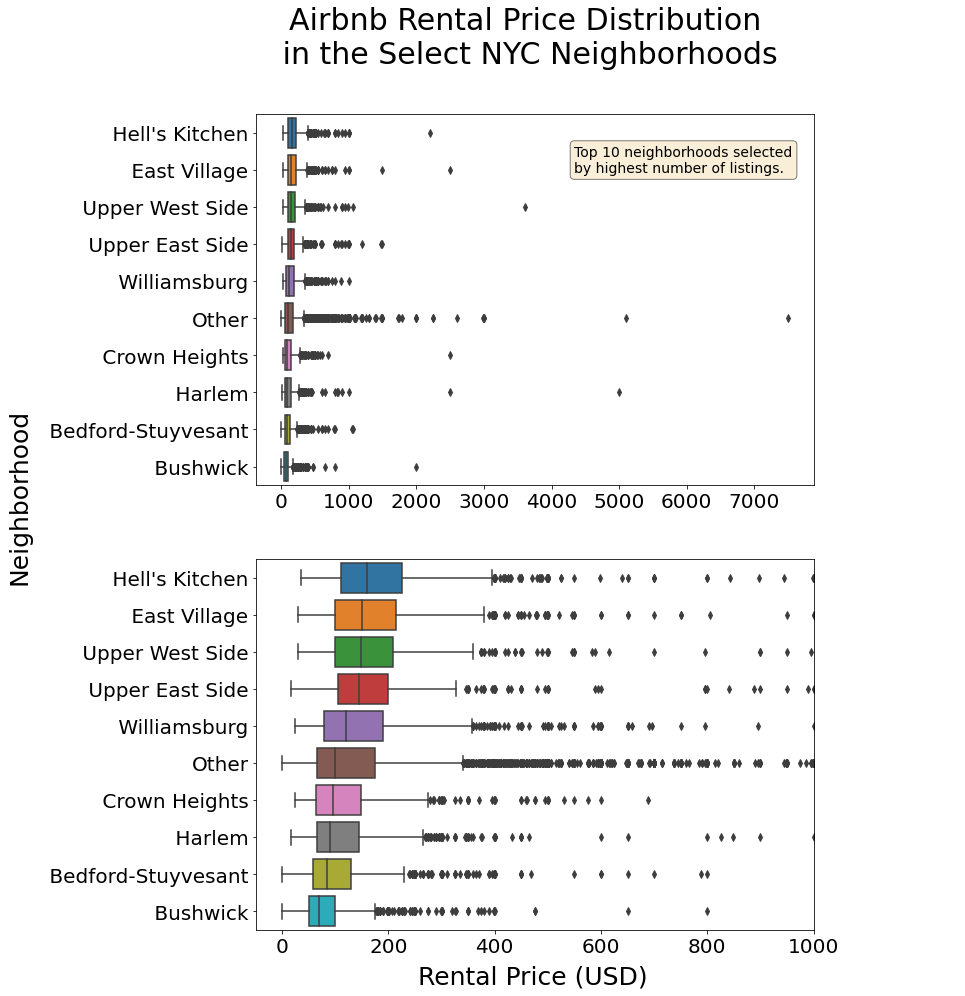

In [16]:
fig, axes = plt.subplots(2, 1, figsize = (10,15))

sns.boxplot(
    x = 'formatted_price',
    y = 'most_listings_nbhood',
    data = prices,
    order = top_10_nbhood_median_sorted,
    ax = axes[0]
)
axes[0].tick_params(axis = 'both', which = 'major', labelsize = 20)
axes[0].set(xlabel = None)
axes[0].set(ylabel = None)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
nbhood_annotation = r'''Top 10 neighborhoods selected
by highest number of listings.'''
axes[0].text(0.525, 1.4, nbhood_annotation, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

sns.boxplot(
    x = 'formatted_price',
    y = 'most_listings_nbhood',
    data = prices,
    order = top_10_nbhood_median_sorted,
    ax = axes[1]
)
axes[1].set_xlim(-50,1000)
axes[1].tick_params(axis = 'both', which = 'major', labelsize = 20)
axes[1].set(xlabel = None)
axes[1].set(ylabel = None)

fig.text(x = 0.35, y = 0.075, s = 'Rental Price (USD)', fontsize = 25)
fig.text(x = -0.22, y = 0.45, s = 'Neighborhood', fontsize = 25, rotation = 90)
fig.suptitle('Airbnb Rental Price Distribution\n in the Select NYC Neighborhoods', fontsize = 30)
plt.show()

Here, it looks like neighborhood also plays an important role in the rental price.

How many nieghborhoods are there in each borough?

In [17]:
prices.groupby('formatted_borough')['formatted_nbhood'].nunique()

formatted_borough
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    39
Name: formatted_nbhood, dtype: int64

In [18]:
manhattan_df = prices[prices['formatted_borough'] == 'Manhattan']

manhattan_df.head()

,listing_id,price,nbhood_full,formatted_price,formatted_borough,formatted_nbhood,most_listings_nbhood
9,24412104,10 dollars,"Manhattan, Kips Bay",10.0,Manhattan,Kips Bay,Other
14,21893604,12 dollars,"Manhattan, Chelsea",12.0,Manhattan,Chelsea,Other
17,3258197,16 dollars,"Manhattan, Upper East Side",16.0,Manhattan,Upper East Side,Upper East Side
18,6364324,16 dollars,"Manhattan, Harlem",16.0,Manhattan,Harlem,Harlem
29,21935569,20 dollars,"Manhattan, Washington Heights",20.0,Manhattan,Washington Heights,Other


In [19]:
manhattan_counts = manhattan_df.groupby('formatted_nbhood')['listing_id'].count().sort_values(ascending = False).index
manhattan_counts

Index([' Harlem', ' Hell's Kitchen', ' East Village', ' Upper East Side',
       ' Upper West Side', ' East Harlem', ' Midtown', ' Chelsea',
       ' Lower East Side', ' Washington Heights', ' Financial District',
       ' West Village', ' Chinatown', ' SoHo', ' Murray Hill', ' Kips Bay',
       ' Greenwich Village', ' Gramercy', ' Nolita', ' Inwood',
       ' Morningside Heights', ' Theater District', ' Little Italy',
       ' Tribeca', ' Two Bridges', ' NoHo', ' Flatiron District',
       ' Roosevelt Island', ' Battery Park City', ' Civic Center',
       ' Stuyvesant Town', ' Marble Hill'],
      dtype='object', name='formatted_nbhood')

In [20]:
most_man = lambda nbhood: nbhood if nbhood in manhattan_counts[:15] else 'Other'

manhattan_df['most_man'] = manhattan_df['formatted_nbhood'].apply(most_man)

manhattan_df[manhattan_df['most_man'] == 'Other']

C:\Users\zcron\AppData\Local\Temp\ipykernel_11004\341498736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_df['most_man'] = manhattan_df['formatted_nbhood'].apply(most_man)


,listing_id,price,nbhood_full,formatted_price,formatted_borough,formatted_nbhood,most_listings_nbhood,most_man
9,24412104,10 dollars,"Manhattan, Kips Bay",10.0,Manhattan,Kips Bay,Other,Other
44,7760204,22 dollars,"Manhattan, Inwood",22.0,Manhattan,Inwood,Other,Other
144,32722219,27 dollars,"Manhattan, Inwood",27.0,Manhattan,Inwood,Other,Other
184,11319227,29 dollars,"Manhattan, Inwood",29.0,Manhattan,Inwood,Other,Other
433,32792970,33 dollars,"Manhattan, Inwood",33.0,Manhattan,Inwood,Other,Other
...,...,...,...,...,...,...,...,...
25174,32317538,1200 dollars,"Manhattan, Gramercy",1200.0,Manhattan,Gramercy,Other,Other
25186,26424516,1500 dollars,"Manhattan, Flatiron District",1500.0,Manhattan,Flatiron District,Other,Other
25190,20016493,1795 dollars,"Manhattan, NoHo",1795.0,Manhattan,NoHo,Other,Other
25194,30091241,2000 dollars,"Manhattan, Tribeca",2000.0,Manhattan,Tribeca,Other,Other


Index([' Financial District', ' SoHo', ' West Village', ' Midtown',
       ' Murray Hill', ' Chelsea', ' Hell's Kitchen', ' East Village',
       ' Lower East Side', 'Other', ' Upper West Side', ' Chinatown',
       ' Upper East Side', ' East Harlem', ' Harlem', ' Washington Heights'],
      dtype='object', name='most_man')


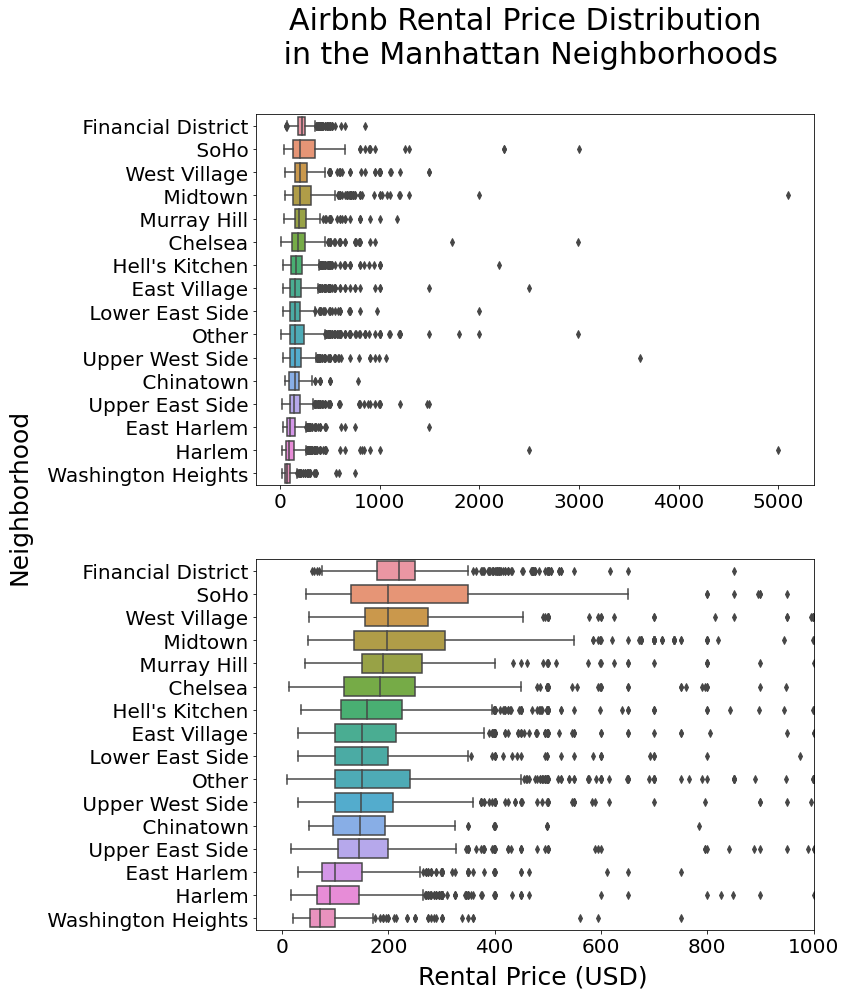

In [21]:
most_man_nbhood_median_sorted = manhattan_df.groupby(by = 'most_man')['formatted_price'].median().sort_values(ascending = False).index
print(most_man_nbhood_median_sorted)

fig, axes = plt.subplots(2, 1, figsize = (10,15))

sns.boxplot(
    x = 'formatted_price',
    y = 'most_man',
    data = manhattan_df,
    order = most_man_nbhood_median_sorted,
    ax = axes[0]
)
axes[0].tick_params(axis = 'both', which = 'major', labelsize = 20)
axes[0].set(xlabel = None)
axes[0].set(ylabel = None)

sns.boxplot(
    x = 'formatted_price',
    y = 'most_man',
    data = manhattan_df,
    order = most_man_nbhood_median_sorted,
    ax = axes[1]
)
axes[1].set_xlim(-50,1000)
axes[1].tick_params(axis = 'both', which = 'major', labelsize = 20)
axes[1].set(xlabel = None)
axes[1].set(ylabel = None)

fig.text(x = 0.35, y = 0.075, s = 'Rental Price (USD)', fontsize = 25)
fig.text(x = -0.22, y = 0.45, s = 'Neighborhood', fontsize = 25, rotation = 90)
fig.suptitle('Airbnb Rental Price Distribution\n in the Manhattan Neighborhoods', fontsize = 30)
plt.show()

In [76]:
def borough_box(borough, df):
    '''
    This function makes the above boxplot analysis
    reproducable for each of the five boroughs.
    
    borough = given NYC borough.
    
    df = dataframe with relevent data.
    '''
    
    #reducing the data set to given borough
    borough_df = df[df['formatted_borough'] == borough]
    
    #getting neighborhood names, ordered by number of listings
    borough_counts = borough_df.groupby('formatted_nbhood')['listing_id'].count().sort_values(ascending = False).index
    
    #collapsing neighborhoods with a smaller number rentals into "Other" category 
    most_borough = lambda nbhood: nbhood if nbhood in borough_counts[:15] else 'Other'
    borough_df['most_borough'] = borough_df['formatted_nbhood'].apply(most_borough)
    
    #sorting neighborhoods by median price
    most_borough_nbhood_median_sorted = borough_df.groupby(by = 'most_borough')['formatted_price'].median().sort_values(ascending = False).index

    #Plotting routines
    if borough_df['formatted_price'].max() > 2000: 
        fig, axes = plt.subplots(2, 1, figsize = (10,15))

        sns.boxplot(
            x = 'formatted_price',
            y = 'most_borough',
            data = borough_df,
            order = most_borough_nbhood_median_sorted,
            ax = axes[0]
        )
        axes[0].tick_params(axis = 'both', which = 'major', labelsize = 20)
        axes[0].set(xlabel = None)
        axes[0].set(ylabel = None)

        sns.boxplot(
            x = 'formatted_price',
            y = 'most_borough',
            data = borough_df,
            order = most_borough_nbhood_median_sorted,
            ax = axes[1]
        )
        axes[1].set_xlim(-50,1000)
        axes[1].tick_params(axis = 'both', which = 'major', labelsize = 20)
        axes[1].set(xlabel = None)
        axes[1].set(ylabel = None)

        fig.text(x = 0.45, y = 0.075, s = 'Rental Price (USD)', fontsize = 25)
        fig.text(x = 0, y = 0.45, s = 'Neighborhood', fontsize = 25, rotation = 90)
        fig.suptitle('Airbnb Rental Price Distribution\n in ' + borough + ' Neighborhoods', fontsize = 30)
        plt.subplots_adjust(left = 0.35)
    else:
        fig = plt.figure(figsize = (15,10))

        sns.boxplot(
            x = 'formatted_price',
            y = 'most_borough',
            data = borough_df,
            order = most_borough_nbhood_median_sorted
        )
        plt.xlabel('Rental Price (USD)', fontsize = 25)
        plt.ylabel('Neighborhood', fontsize = 25)
        plt.title('Airbnb Rental Price Distribution\n in ' + borough + ' Neighborhoods', fontsize = 30)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.subplots_adjust(left = 0.35)

C:\Users\zcron\AppData\Local\Temp\ipykernel_11004\3433764726.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_df['most_borough'] = borough_df['formatted_nbhood'].apply(most_borough)


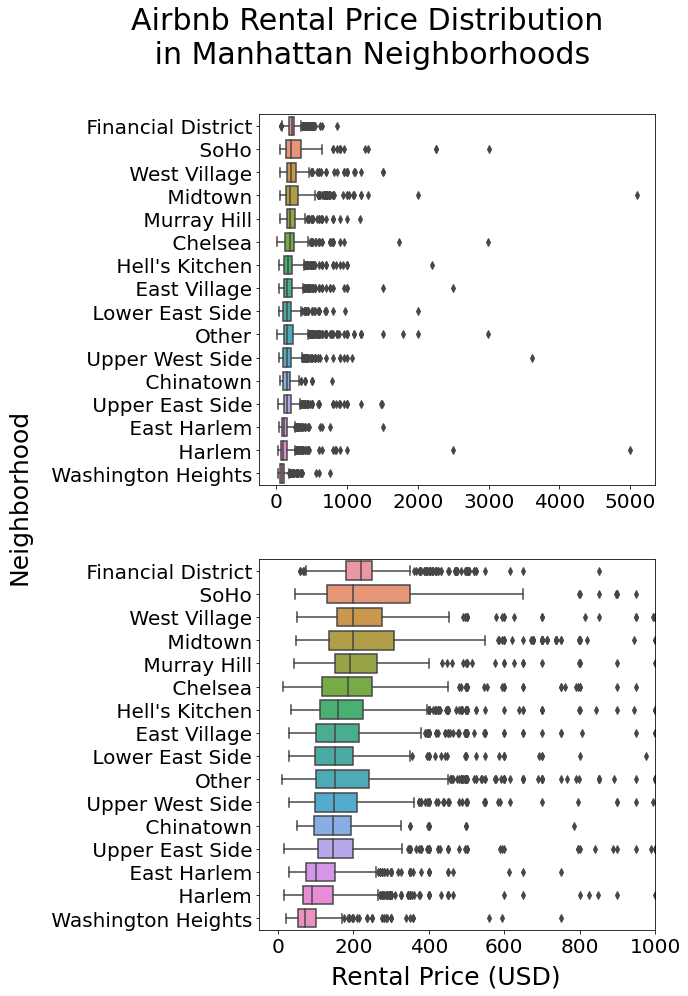

In [75]:
borough_box('Manhattan', prices)
plt.savefig('man_price_box.png')
plt.show()

C:\Users\zcron\AppData\Local\Temp\ipykernel_11004\884850551.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_df['most_borough'] = borough_df['formatted_nbhood'].apply(most_borough)


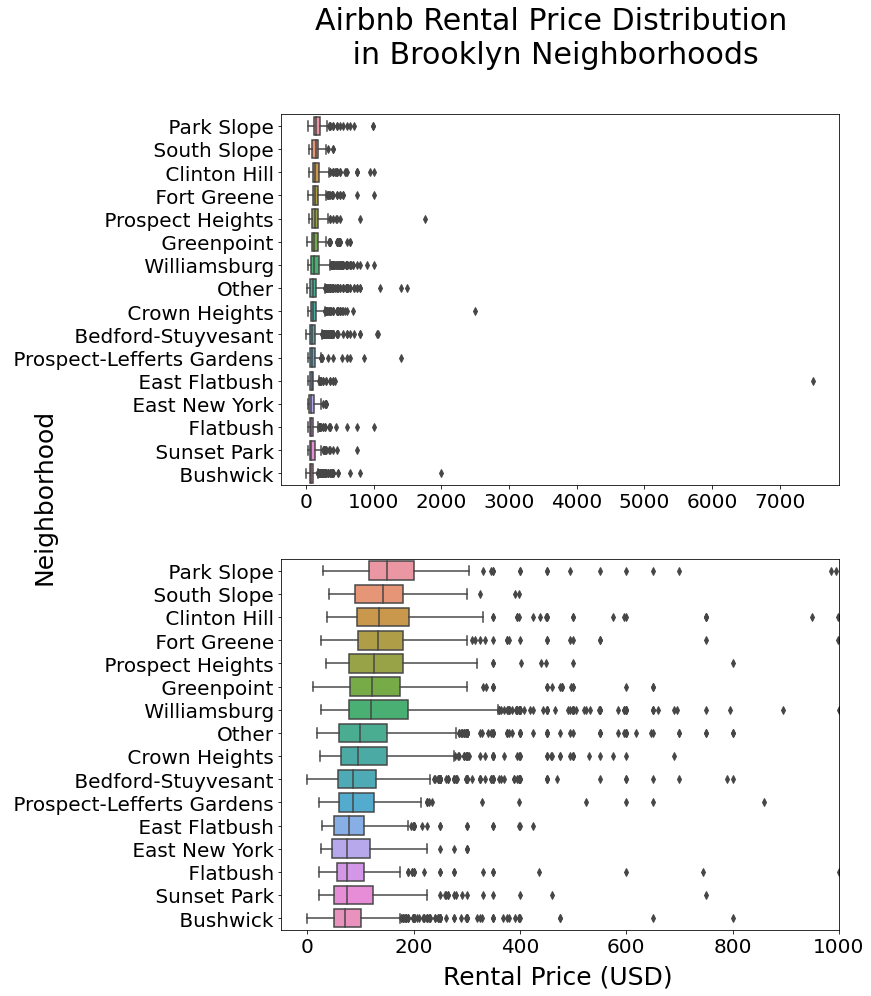

In [33]:
borough_box('Brooklyn', prices)

C:\Users\zcron\AppData\Local\Temp\ipykernel_11004\884850551.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_df['most_borough'] = borough_df['formatted_nbhood'].apply(most_borough)


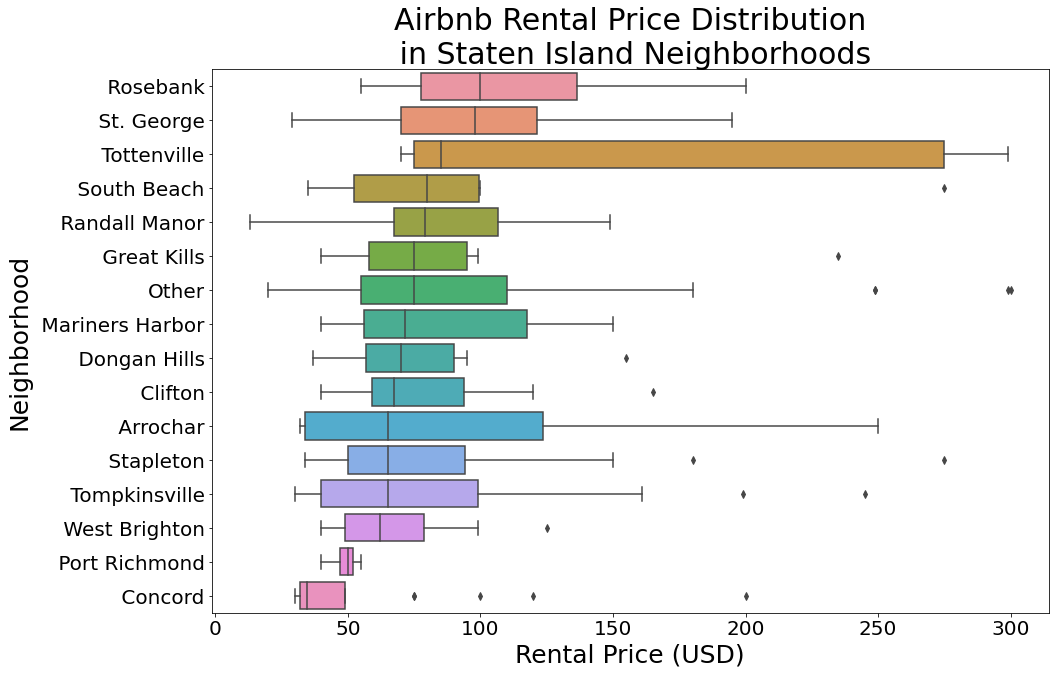

In [34]:
borough_box('Staten Island', prices)

C:\Users\zcron\AppData\Local\Temp\ipykernel_11004\884850551.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_df['most_borough'] = borough_df['formatted_nbhood'].apply(most_borough)


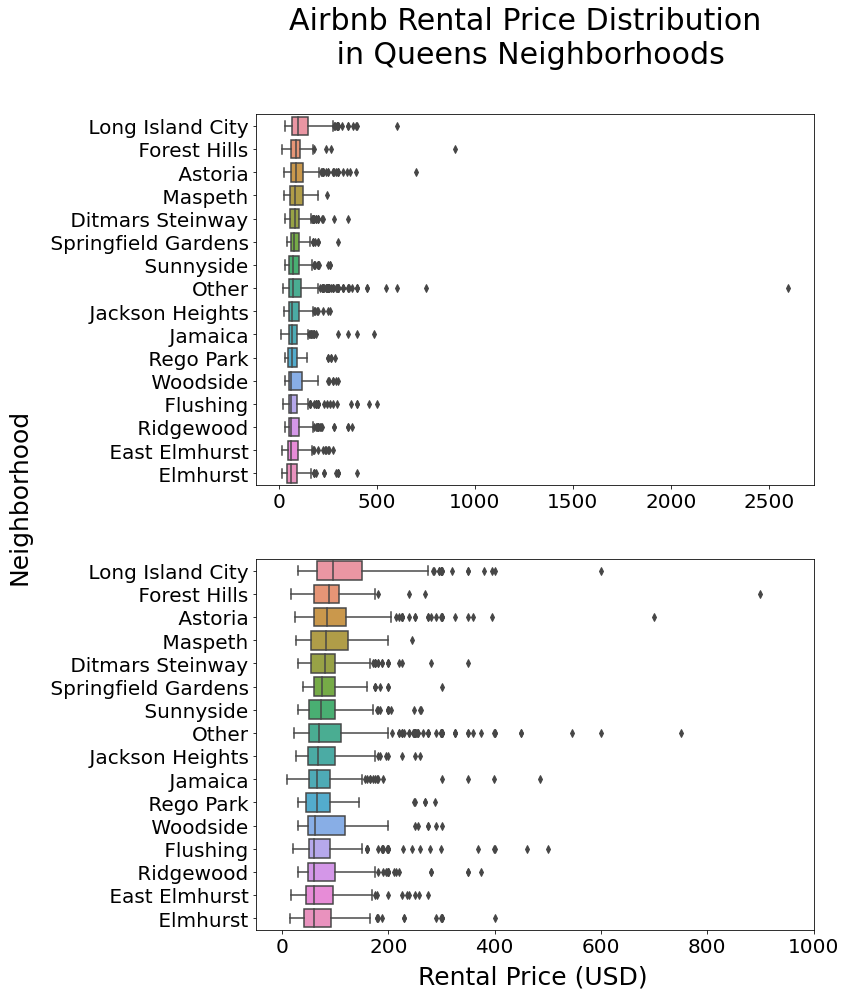

In [35]:
borough_box('Queens', prices)

C:\Users\zcron\AppData\Local\Temp\ipykernel_11004\1560503245.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_df['most_borough'] = borough_df['formatted_nbhood'].apply(most_borough)


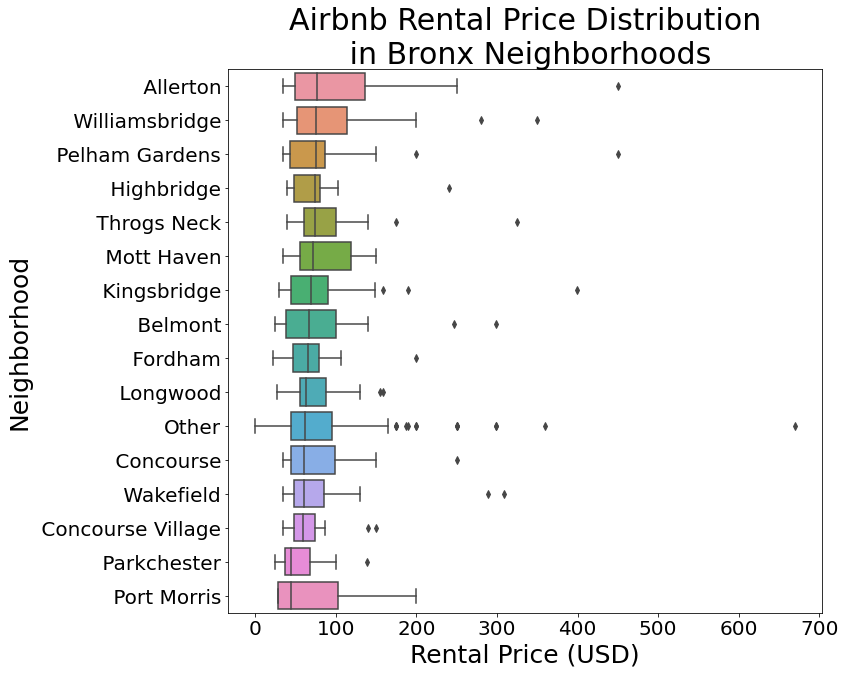

In [77]:
borough_box('Bronx', prices)
plt.savefig('bronx_price_box.png')
plt.show()

I created the above boxplots to try and determine if the neighborhood is important to the rental price. While there appears to some overlap in the cheaper neighborhoods, most of Brooklyn and Manhattan tends to be more expensive then any of ther neighborhoods in the other boroughs. For that reason, I will focus my attention on borough.

## 3.2 Room Type Analysis

Moving on to the `airbnb_room_type.csv` data set.

In [79]:
room_type = pd.read_csv('airbnb_room_type.csv')

room_type.head()

,listing_id,description,room_type,formatted_description,formatted_room_type
0,2595,Skylit Midtown Castle,Entire home/apt,Skylit Midtown Castle,entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt,Cozy Entire Floor of Brownstone,entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Large Cozy 1 BR Apartment In Midtown East,entire home/apt
3,5178,Large Furnished Room Near B'way,private room,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Cute & Cozy Lower East Side 1 bdrm,entire home/apt


In [80]:
room_type.describe(include = 'all')

,listing_id,description,room_type,formatted_description,formatted_room_type
count,2.520900e+04,25209,25209,25209,25209
unique,NaN,24947,9,24940,3
top,NaN,#ERROR!,Entire home/apt,Loft Suite @ The Box House Hotel,entire home/apt
freq,NaN,10,8458,10,13266
mean,2.068922e+07,NaN,NaN,NaN,NaN
std,1.102928e+07,NaN,NaN,NaN,NaN
min,2.595000e+03,NaN,NaN,NaN,NaN
25%,1.202273e+07,NaN,NaN,NaN,NaN
50%,2.234391e+07,NaN,NaN,NaN,NaN
75%,3.037669e+07,NaN,NaN,NaN,NaN


This data set contains the same number of records as the `airbnb_price.csv` file suggesting that I won't need to worry about missing data when I conduct a join later on! That's a big help!

Looking at the data itself, I can see that about 350 units share common descriptions, but the descriptions may have been formatted in a way that is invalid on Airbnb. I also see that the most common room type in NYC is the entire home/apt. What about the other types?

In [81]:
room_type['formatted_room_type'].value_counts()

entire home/apt    13266
private room       11356
shared room          587
Name: formatted_room_type, dtype: int64

Because this data set does not include any info on price or where the listing is, I will have to wait until I combine the data to continue.

## 3.3 Last Review Analysis

Last but not least, the last review data set.

In [82]:
last_review = pd.read_csv('airbnb_last_review.csv')

last_review.head()

,host_name,listing_id,last_review,formatted_name,formatted_date
0,Jennifer,2595,May 21 2019,Jennifer,May-21-2019
1,LisaRoxanne,3831,July 05 2019,LisaRoxanne,July-05-2019
2,Chris,5099,June 22 2019,Chris,June-22-2019
3,Shunichi,5178,June 24 2019,Shunichi,June-24-2019
4,Ben,5238,June 09 2019,Ben,June-09-2019


In [83]:
last_review.describe(include = 'all')

,host_name,listing_id,last_review,formatted_name,formatted_date
count,25201,2.520900e+04,25209,25201,25209
unique,7363,NaN,190,7363,190
top,Michael,NaN,June 23 2019,Michael,June-23-2019
freq,215,NaN,1413,215,1413
mean,NaN,2.068922e+07,NaN,NaN,NaN
std,NaN,1.102928e+07,NaN,NaN,NaN
min,NaN,2.595000e+03,NaN,NaN,NaN
25%,NaN,1.202273e+07,NaN,NaN,NaN
50%,NaN,2.234391e+07,NaN,NaN,NaN
75%,NaN,3.037669e+07,NaN,NaN,NaN


There are a few records with no names, it seems. Is there a reason for it?

In [84]:
last_review[last_review['formatted_name'].isna() == True]

,host_name,listing_id,last_review,formatted_name,formatted_date
263,NaN,100184,July 08 2019,NaN,July-08-2019
3040,NaN,4183989,May 23 2019,NaN,May-23-2019
4039,NaN,6292866,June 19 2019,NaN,June-19-2019
4269,NaN,6786181,June 19 2019,NaN,June-19-2019
6338,NaN,12113879,July 02 2019,NaN,July-02-2019
8060,NaN,15648096,July 07 2019,NaN,July-07-2019
12128,NaN,21867710,January 01 2019,NaN,January-01-2019
12164,NaN,21901156,January 01 2019,NaN,January-01-2019


Doesn't appear to any rhyme or reason as to why the host name is missing. I can't even tell if this is the same user at this point.

I would like to know who is hosting the most listings. What I really want to know is, amoung the 10 host with the most listings, who charges the most?

Beyond that, I would like to see in what month was aibnb in NYC most popular. By counting the number last reviews in each month, I will be able to make an educated guess as to which month is the busiest. I won't be able to say for sure because some users may put off leaving reviews.

In [85]:
last_review['formatted_name'].value_counts()

Michael            215
Sonder (NYC)       207
David              197
John               177
Alex               153
                  ... 
Ted & Tony           1
Saori                1
Martha Cristina      1
Stelios              1
Rusaa                1
Name: formatted_name, Length: 7363, dtype: int64

In [86]:
last_review['month'] = last_review['formatted_date'].str.split('-', expand = True)[0]

last_review.head()

,host_name,listing_id,last_review,formatted_name,formatted_date,month
0,Jennifer,2595,May 21 2019,Jennifer,May-21-2019,May
1,LisaRoxanne,3831,July 05 2019,LisaRoxanne,July-05-2019,July
2,Chris,5099,June 22 2019,Chris,June-22-2019,June
3,Shunichi,5178,June 24 2019,Shunichi,June-24-2019,June
4,Ben,5238,June 09 2019,Ben,June-09-2019,June


In [87]:
last_review['month'].value_counts()

June        12601
July         4725
May          3697
April        1456
January      1440
March         820
February      470
Name: month, dtype: int64

I now know that June is the busiest month on Airbnb in NYC! It makes sense that the summer months would have more bookings due to NYC winter weather. 

## 3.4 Merging the Data Sets

I am now going to join the data sets. This will allow me to determine if the rental price also depends on host and/or room type. 

In [88]:
master_data = prices.merge(room_type, on = 'listing_id', how = 'left').merge(last_review, on = 'listing_id', how = 'left')

master_data.head()

,listing_id,price,nbhood_full,formatted_price,formatted_borough,formatted_nbhood,most_listings_nbhood,description,room_type,formatted_description,formatted_room_type,host_name,last_review,formatted_name,formatted_date,month
0,20333471,0 dollars,"Bronx, East Morrisania",0.0,Bronx,East Morrisania,Other,‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,PRIVATE ROOM,‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,private room,Anisha,June 24 2019,Anisha,June-24-2019,June
1,20523843,0 dollars,"Brooklyn, Bushwick",0.0,Brooklyn,Bushwick,Bushwick,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",PRIVATE ROOM,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",private room,Martial Loft,May 18 2019,Martial Loft,May-18-2019,May
2,20639628,0 dollars,"Brooklyn, Bedford-Stuyvesant",0.0,Brooklyn,Bedford-Stuyvesant,Bedford-Stuyvesant,Spacious comfortable master bedroom with nice ...,private room,Spacious comfortable master bedroom with nice ...,private room,Adeyemi,June 15 2019,Adeyemi,June-15-2019,June
3,20639792,0 dollars,"Brooklyn, Bedford-Stuyvesant",0.0,Brooklyn,Bedford-Stuyvesant,Bedford-Stuyvesant,Contemporary bedroom in brownstone with nice view,Private room,Contemporary bedroom in brownstone with nice view,private room,Adeyemi,June 21 2019,Adeyemi,June-21-2019,June
4,20639914,0 dollars,"Brooklyn, Bedford-Stuyvesant",0.0,Brooklyn,Bedford-Stuyvesant,Bedford-Stuyvesant,Cozy yet spacious private brownstone bedroom,PRIVATE ROOM,Cozy yet spacious private brownstone bedroom,private room,Adeyemi,June 23 2019,Adeyemi,June-23-2019,June


In [90]:
master_data.describe(include = 'all')

,listing_id,price,nbhood_full,formatted_price,formatted_borough,formatted_nbhood,most_listings_nbhood,description,room_type,formatted_description,formatted_room_type,host_name,last_review,formatted_name,formatted_date,month
count,2.520900e+04,25209,25209,25209.000000,25209,25209,25209,25209,25209,25209,25209,25201,25209,25201,25209,25209
unique,NaN,536,217,NaN,5,216,10,24947,9,24940,3,7363,190,7363,190,7
top,NaN,150 dollars,"Brooklyn, Bedford-Stuyvesant",NaN,Brooklyn,Bedford-Stuyvesant,Other,Home away from home,Entire home/apt,Loft Suite @ The Box House Hotel,entire home/apt,Michael,June 23 2019,Michael,June-23-2019,June
freq,NaN,982,2209,NaN,10466,2209,14159,10,8458,10,13266,215,1413,215,1413,12601
mean,2.068922e+07,NaN,NaN,141.777936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.102928e+07,NaN,NaN,147.349137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.595000e+03,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.202273e+07,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.234391e+07,NaN,NaN,105.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.037669e+07,NaN,NaN,175.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Before moving on with my analysis, I want to revisit the no-name hosts and the $\$$0 rentals. Now that I have access to all the information, is there an obvious reason why they have these values?

In [91]:
master_data[master_data['formatted_name'].isna() == True]

,listing_id,price,nbhood_full,formatted_price,formatted_borough,formatted_nbhood,most_listings_nbhood,description,room_type,formatted_description,formatted_room_type,host_name,last_review,formatted_name,formatted_date,month
2577,100184,50 dollars,"Queens, Queens Village",50.0,Queens,Queens Village,Other,Bienvenue,private room,Bienvenue,private room,NaN,July 08 2019,NaN,July-08-2019,July
7460,15648096,75 dollars,"Bronx, Highbridge",75.0,Bronx,Highbridge,Other,Spacious 2 bedroom close to Manhattan,Entire home/apt,Spacious 2 bedroom close to Manhattan,entire home/apt,NaN,July 07 2019,NaN,July-07-2019,July
9119,6292866,85 dollars,"Brooklyn, East Flatbush",85.0,Brooklyn,East Flatbush,Other,Modern Quiet Gem Near All,entire home/apt,Modern Quiet Gem Near All,entire home/apt,NaN,June 19 2019,NaN,June-19-2019,June
9520,4183989,86 dollars,"Manhattan, Harlem",86.0,Manhattan,Harlem,Harlem,SPRING in the City!! Zen-Style Tranquil Bedroom,Private room,SPRING in the City!! Zen-Style Tranquil Bedroom,private room,NaN,May 23 2019,NaN,May-23-2019,May
11710,6786181,100 dollars,"Brooklyn, East Flatbush",100.0,Brooklyn,East Flatbush,Other,R&S Modern Spacious Hideaway,Entire home/apt,R&S Modern Spacious Hideaway,entire home/apt,NaN,June 19 2019,NaN,June-19-2019,June
14092,21867710,120 dollars,"Manhattan, Hell's Kitchen",120.0,Manhattan,Hell's Kitchen,Hell's Kitchen,Amazing room in the centre on Manhatten! Welcome!,Private room,Amazing room in the centre on Manhatten! Welcome!,private room,NaN,January 01 2019,NaN,January-01-2019,January
14093,21901156,120 dollars,"Manhattan, Hell's Kitchen",120.0,Manhattan,Hell's Kitchen,Hell's Kitchen,Best Deal! Lovely place in Manhattan! Time Squ...,Private room,Best Deal! Lovely place in Manhattan! Time Squ...,private room,NaN,January 01 2019,NaN,January-01-2019,January
21519,12113879,220 dollars,"Manhattan, Chelsea",220.0,Manhattan,Chelsea,Other,"Sunny, Large West Village 1 BR Near Everything",Entire home/apt,"Sunny, Large West Village 1 BR Near Everything",entire home/apt,NaN,July 02 2019,NaN,July-02-2019,July


There doesn't appear to be any structure saying why the host name might be missing. Does Airbnb allow anonymus hosting? Because I can't know for sure, I cannot assume this information to be structurally missing data. I therefore have to assume it is missing not at random data.

What about the $\$$0 rentals?

In [92]:
master_data[master_data['formatted_price'] == 0]

,listing_id,price,nbhood_full,formatted_price,formatted_borough,formatted_nbhood,most_listings_nbhood,description,room_type,formatted_description,formatted_room_type,host_name,last_review,formatted_name,formatted_date,month
0,20333471,0 dollars,"Bronx, East Morrisania",0.0,Bronx,East Morrisania,Other,‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,PRIVATE ROOM,‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,private room,Anisha,June 24 2019,Anisha,June-24-2019,June
1,20523843,0 dollars,"Brooklyn, Bushwick",0.0,Brooklyn,Bushwick,Bushwick,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",PRIVATE ROOM,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",private room,Martial Loft,May 18 2019,Martial Loft,May-18-2019,May
2,20639628,0 dollars,"Brooklyn, Bedford-Stuyvesant",0.0,Brooklyn,Bedford-Stuyvesant,Bedford-Stuyvesant,Spacious comfortable master bedroom with nice ...,private room,Spacious comfortable master bedroom with nice ...,private room,Adeyemi,June 15 2019,Adeyemi,June-15-2019,June
3,20639792,0 dollars,"Brooklyn, Bedford-Stuyvesant",0.0,Brooklyn,Bedford-Stuyvesant,Bedford-Stuyvesant,Contemporary bedroom in brownstone with nice view,Private room,Contemporary bedroom in brownstone with nice view,private room,Adeyemi,June 21 2019,Adeyemi,June-21-2019,June
4,20639914,0 dollars,"Brooklyn, Bedford-Stuyvesant",0.0,Brooklyn,Bedford-Stuyvesant,Bedford-Stuyvesant,Cozy yet spacious private brownstone bedroom,PRIVATE ROOM,Cozy yet spacious private brownstone bedroom,private room,Adeyemi,June 23 2019,Adeyemi,June-23-2019,June
5,21291569,0 dollars,"Brooklyn, Bushwick",0.0,Brooklyn,Bushwick,Bushwick,Coliving in Brooklyn! Modern design / Shared room,Shared room,Coliving in Brooklyn! Modern design / Shared room,shared room,Sergii,June 22 2019,Sergii,June-22-2019,June
6,21304320,0 dollars,"Brooklyn, Bushwick",0.0,Brooklyn,Bushwick,Bushwick,Best Coliving space ever! Shared room.,Shared room,Best Coliving space ever! Shared room.,shared room,Sergii,May 24 2019,Sergii,May-24-2019,May


Again, no really structure as to why these are listed as $\$$0. I will assume they are approporiate.

As I said previously, I wanted to take a look at the pricing data for the 10 hosts with the most Airbnb listings.

In [93]:
top_10_hosts = [name for name in master_data['formatted_name'].value_counts().index[:9]]

name_filter = lambda name: name if name in top_10_hosts else 'Other'

master_data['top_names'] = master_data['formatted_name'].apply(name_filter)
master_data.head()

,listing_id,price,nbhood_full,formatted_price,formatted_borough,formatted_nbhood,most_listings_nbhood,description,room_type,formatted_description,formatted_room_type,host_name,last_review,formatted_name,formatted_date,month,top_names
0,20333471,0 dollars,"Bronx, East Morrisania",0.0,Bronx,East Morrisania,Other,‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,PRIVATE ROOM,‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,private room,Anisha,June 24 2019,Anisha,June-24-2019,June,Other
1,20523843,0 dollars,"Brooklyn, Bushwick",0.0,Brooklyn,Bushwick,Bushwick,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",PRIVATE ROOM,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",private room,Martial Loft,May 18 2019,Martial Loft,May-18-2019,May,Other
2,20639628,0 dollars,"Brooklyn, Bedford-Stuyvesant",0.0,Brooklyn,Bedford-Stuyvesant,Bedford-Stuyvesant,Spacious comfortable master bedroom with nice ...,private room,Spacious comfortable master bedroom with nice ...,private room,Adeyemi,June 15 2019,Adeyemi,June-15-2019,June,Other
3,20639792,0 dollars,"Brooklyn, Bedford-Stuyvesant",0.0,Brooklyn,Bedford-Stuyvesant,Bedford-Stuyvesant,Contemporary bedroom in brownstone with nice view,Private room,Contemporary bedroom in brownstone with nice view,private room,Adeyemi,June 21 2019,Adeyemi,June-21-2019,June,Other
4,20639914,0 dollars,"Brooklyn, Bedford-Stuyvesant",0.0,Brooklyn,Bedford-Stuyvesant,Bedford-Stuyvesant,Cozy yet spacious private brownstone bedroom,PRIVATE ROOM,Cozy yet spacious private brownstone bedroom,private room,Adeyemi,June 23 2019,Adeyemi,June-23-2019,June,Other


I will now save my master data set so I can create a few pivot tables to further my analysis.

In [94]:
master_data.to_csv('master_data.csv', index = False)

The pivot tables gave further evidence that borough is important to rental cost. 

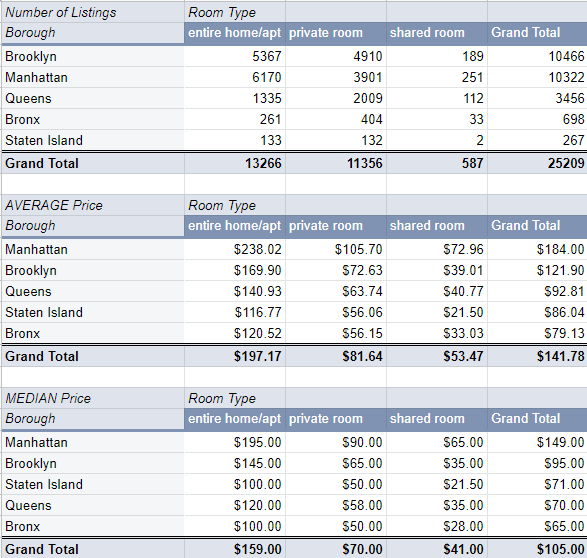

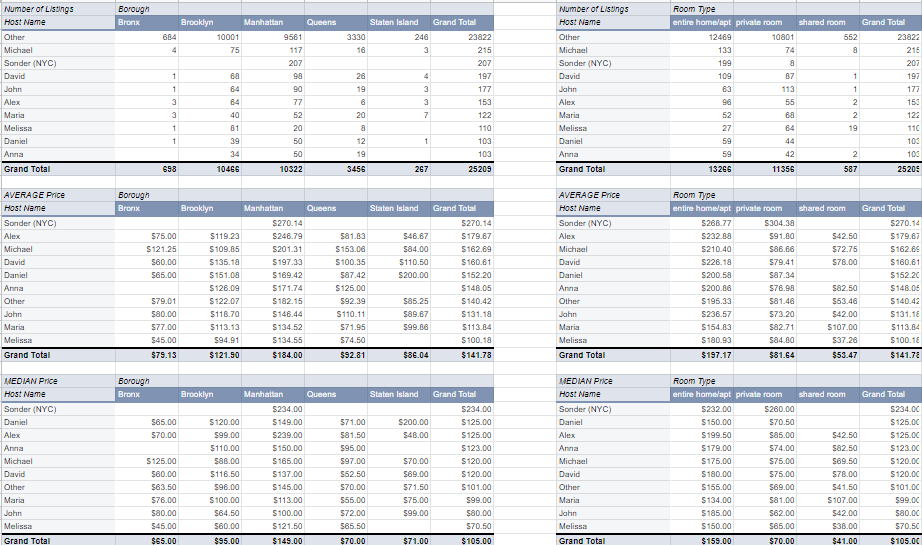

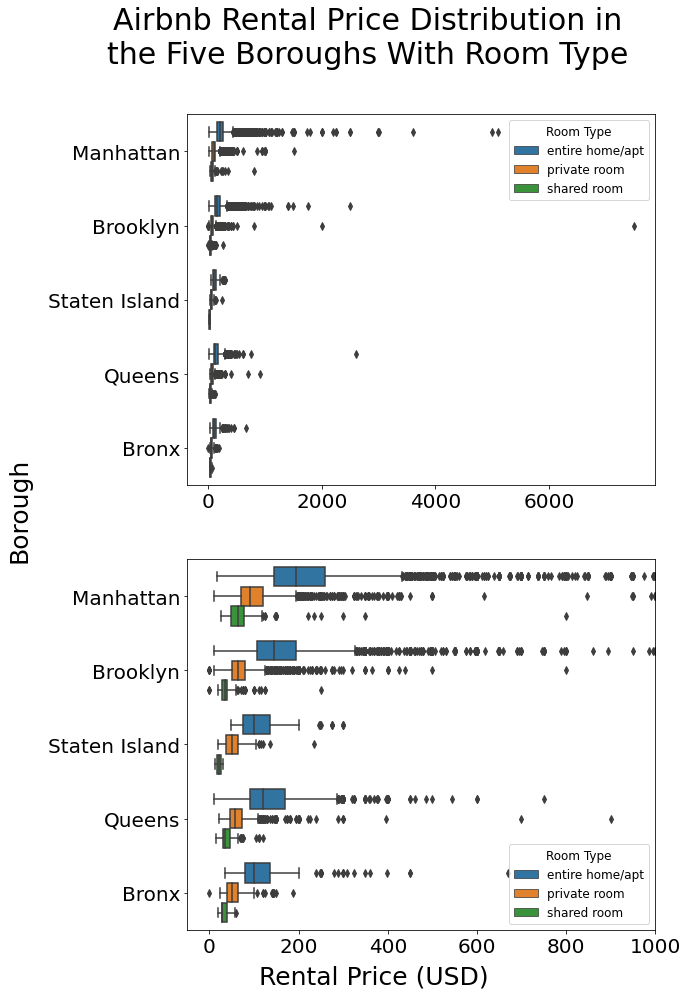

In [95]:
rooms = [room for room in master_data['formatted_room_type'].unique()]

room_order = master_data.groupby(by = 'formatted_room_type')['formatted_price'].median().sort_values(ascending = False).index

fig, axes = plt.subplots(2, 1, figsize = (10,15))

sns.boxplot(
    data = master_data,
    x = 'formatted_price',
    y = 'formatted_borough',
    hue = 'formatted_room_type',
    order = borough_median_order,
    hue_order = room_order,
    ax = axes[0]
)

sns.boxplot(
    data = master_data,
    x = 'formatted_price',
    y = 'formatted_borough',
    hue = 'formatted_room_type',
    order = borough_median_order,
    hue_order = room_order,
    ax = axes[1]
)

axes[0].tick_params(axis = 'both', which = 'major', labelsize = 20)
axes[0].set(xlabel = None)
axes[0].set(ylabel = None)
axes[0].legend(title = 'Room Type', fontsize = 12, title_fontsize = 12)

axes[1].set_xlim((-50, 1000))
axes[1].tick_params(axis = 'both', which = 'major', labelsize = 20)
axes[1].set(xlabel = None)
axes[1].set(ylabel = None)
axes[1].legend(title = 'Room Type', fontsize = 12, title_fontsize = 12)

fig.text(x = 0.35, y = 0.075, s = 'Rental Price (USD)', fontsize = 25)
fig.text(x = 0, y = 0.47, s = 'Borough', fontsize = 25, rotation = 90)
fig.suptitle('Airbnb Rental Price Distribution in\nthe Five Boroughs With Room Type', fontsize = 30)
plt.subplots_adjust(left = 0.25)
plt.savefig('rt_borough_box.png')
plt.show()

# 4. Conclusions

**Question:** How many listings are there in NYC? Each Borough? Each Neighborhood?

There are 25,209 Airbnb listings for NYC in 2019: 10,466 of which are in Brooklynn, 10,322 were hosted in Manhattan, 3,456 were from Queens, 698 in the Bronx and 267 in Staten Island. 

With 216 neighborhoods present in the 5 boroughs, I decided to focus on the 10 neighborhoods with the most listings. Bedford-Stuyvesant was the neighborhood with most rentals at 2209 rentals.

**Question:** What are the average and median rental prices in NYC? Each Borough?

The average and median listing price for Airbnbs in 2019 were $\$$141.87 $\pm$ $\$$147.35 and $\$$105.00, IQR $\$$106.00, respectively. This, combined with the shape of the price distribution presented in the histogram, resulted in a heavily left-skewed data set. This suggests that median price would be the better summary statistics to use when determining what features drive rental price.

As expected, the neighborhoods that tend to have the highest priced Airbnbs tend to be in Manhattan. Neighborhood data does not appear to add a significant amount of new information in relation to rental price.

**Question:** What is the median rental price for each room type?

As expected, renting an entire house/apartment tended to be the most expensive option with a median price of $\$$159.00. Private rooms were second with a median price of $\$$70.00 while shared rooms tended to be the cheapest with a median price of $\$$41.00. This trend was also observed in each of the five boroughs. This suggests that room type also plays an important role in determine rental price.

**Question:** What drives airbnb rental prices in NYC in 2019?

Based on the above analysis, the biggest drivers for Airbnb rental price in NYC in 2019 are the borough the rental is located in and the room type.  